##3 - Correlation and Classification

This notebook has the correlation (including Mapping method and Topic Modeling) and Classification (including Traditional Algorithms, but deep learning)

In [0]:
import pandas as pd
import glob
import re
import numpy as np
import pickle 

In [0]:
Speech_df = pd.read_pickel('/content/drive/My Drive/Projects/Capstone Project/Final Personal Capstone/Speech_df.pkl')

In [0]:
pip install vaderSentiment

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

sentiment=[]
for sentence in Speech_df.Speech_clean:
  sentiment.append(analyser.polarity_scores(sentence)['compound'])

Speech_df['sentiment_vadar']=sentiment

In [0]:
######## ADD Top words that were used to find custom sentiment scores

custom_senti_df = pd.read_excel('/content/drive/My Drive/Projects/Capstone Project/DATA/Custom Sentiment.xlsx')
custom_senti_df

,sentiment_word,Sentiment
0,provide,0.85
1,cent,0.00
2,development,0.75
3,investment,0.75
4,set,0.00
...,...,...
1498,evaluate,0.00
1499,eventual,0.00
1500,eventually,0.00
1501,everyday,0.00


In [0]:
Agriculture= ['Agriculture','Machinery', 'Produces', 'Storage', 'Marketing', 'Prices', 
              'Animal', 'Husbandry', 'Certification', 'Gradation', 'Crops', 'Dairy', 
              'Fertilizers', 'Pesticides', 'Fisheries', 'Floriculture', 'Horticulture', 
              'Irrigation', 'Organic Farming', 'Plant', 'Seeds','Sericulture' ,
              'Soil', 'Weather' ]

Mining= ['Mining', 'Mines', 'exploration ', 'mineral', 'natural gas', 'petroleum','atomic', 'metallurgy', 'aluminium', 'copper', 'zinc', 'gold', 'nickel', 'Diamonds']

Manufacturing = ['Manufacturing','food products', 'metals', 'rubber', 'petrochemicals', 'chemicals', 'electrical machinery', 
                 'Tobacco', 'Textiles', 'apparel', 'Leather', 'wood', 'paper', 'coke', 'non-metallic', 'mineral', 'Machinery',
                 'equipment', 'Motor vehicles', 'transport equipment', 'Furniture']

Electricity_Gas_Water =['Power', 'Energy', 'Coal', 'Conservation of Energy', 'Petroleum', 'Natural Gas', 'Power', 'Renewable Energy', 
                                 'water', 'clean', 'gas', 'lpg', 'food', 'cooking gas', 'Oil & Natural Gas', 'refining', 'distribution', 
                                 'petroleum products','Bio-fuels']

Construction = ['Infrastructure', 'Power', 'Bridges', 'Dams', 'Roads', 'Urban', 'Housing', 'EWS', 'Rural']

Trade_Hotel_Transport_Communications=['Commerce','Export', 'Import', 'SEZ', 'Trade', 'Promotion', 'Communication', 'Information', 'Technology', 'Post', 'Telecom','Information'
                                      ,'Broadcasting', 'Film', 'Print',  'Media', 'Transport', 'Aviation', 'Metro', 'Railways', 'Surface Transport', 'Water Ways',
                                      'Travel', 'Tourism', 'Places', 'Accommodation', 'Approved Agents']

Finance_Insurance_Real_Estate_Business_Services=['Finance', 'Taxes', 'Insurance', 'Pension', 'Banking', 'Economy', 'Trade', 'Tax',
                                                     'Housing', 'EWS', 'Rural', 'Urban', 'Labour', 'Employment', 'Organized', 'Unorganized']

Community_Social_Personal_Services=['Governance', 'Administration', 'Constitution','Parliament', 'Legislature', 'Government', 
                                       'Grievances', 'Law', 'Justice', 'Judiciary', 'Dispute', 'Enactment', 'Institutions', 'Legal', 
                                       'Personal', 'Social', 'Backward Classes', 'Scheduled Castes', 'Children', 'Disabled', 'Minority', 
                                       'Community', 'Senior Citizen', 'Tribal', 'Women', 'Family', 'Welfare','Health', 'Police', 
                                       'Enforcement', 'Home Affairs']



In [0]:
set(Speech_df.Date)

{'February  26,  2010',
 'February 1, 2017',
 'February 1, 2018',
 'February 1, 2019',
 'February 17, 2014',
 'February 28, 2011',
 'February 28, 2013',
 'February 28, 2015',
 'February 29, 2016',
 'July 10, 2014',
 'July, 5, 2019',
 'March 16, 2012'}

In [0]:
from statistics import mean
Dates= ['February  26,  2010',
 'February 1, 2017',
 'February 1, 2018',
 'February 1, 2019',
 'February 17, 2014',
 'February 28, 2011',
 'February 28, 2013',
 'February 28, 2015',
 'February 29, 2016',
 'July 10, 2014',
 'July, 5, 2019',
 'March 16, 2012']

industries = ['Agriculture', 'Mining', 'Manufacturing', 'Electricity_Gas_Water', 'Construction', 'Trade_Hotel_Transport_Communications', 
              'Finance_Insurance_Real_Estate_Business_Services', 'Community_Social_Personal_Services']

df_industry=pd.DataFrame(columns=industries)
df_industry_counts=pd.DataFrame(columns=industries)
k = 0

for date in Dates: 
  temp = Speech_df.groupby('Date').get_group(date)['Speech_clean']

  words=[]
  agri_sentences=[]
  mini_sentences=[]
  manu_sentences=[]
  elec_sentences=[]
  const_sentences=[]
  trade_sentences=[]
  finance_sentences=[]
  personal_sentences=[]

  agri_sentiment=[]
  mini_sentiment=[]
  manu_sentiment=[]
  elec_sentiment=[]
  const_sentiment=[]
  trade_sentiment=[]
  finance_sentiment=[]
  personal_sentiment=[]

  agri_avg=[]
  mini_avg=[]
  manu_avg=[]
  elec_avg=[]
  const_avg=[]
  trade_avg=[]
  finance_avg=[]
  personal_avg=[]

  for line in temp:
  
    words=line.split()
    for word in words:
      for check in Agriculture:
        if (word == check.lower()):
          agri_sentences.append(line)
    
      for check in Mining: 
        if (word == check.lower()):
          mini_sentences.append(line)

      for check in Manufacturing: 
        if (word == check.lower()):
          manu_sentences.append(line)

      for check in Electricity_Gas_Water: 
        if (word == check.lower()):
          elec_sentences.append(line)

      for check in Construction: 
        if (word == check.lower()):
          const_sentences.append(line)

      for check in Trade_Hotel_Transport_Communications: 
        if (word == check.lower()):
          trade_sentences.append(line)
      
      for check in Finance_Insurance_Real_Estate_Business_Services: 
        if (word == check.lower()):
          finance_sentences.append(line)
        
      for check in Community_Social_Personal_Services: 
        if (word == check.lower()):
          personal_sentences.append(line)



  for sentence in set(agri_sentences): 
    agri_sentiment.append(analyser.polarity_scores(sentence)['compound'])
    

  #print(sum(agri_sentiment))


  for sentence in set(mini_sentences): 
    mini_sentiment.append(analyser.polarity_scores(sentence)['compound'])
  #print(sum(mini_sentiment))

  for sentence in set(manu_sentences): 
    manu_sentiment.append(analyser.polarity_scores(sentence)['compound'])
  #print(sum(manu_sentiment))

  for sentence in set(elec_sentences): 
    elec_sentiment.append(analyser.polarity_scores(sentence)['compound'])
  #print(sum(elec_sentiment))

  for sentence in set(const_sentences): 
    const_sentiment.append(analyser.polarity_scores(sentence)['compound'])
 #print(sum(const_sentiment))

  for sentence in set(trade_sentences): 
    trade_sentiment.append(analyser.polarity_scores(sentence)['compound'])
  #print(sum(trade_sentiment))

  for sentence in set(finance_sentences): 
    finance_sentiment.append(analyser.polarity_scores(sentence)['compound'])
  #print(sum(trade_sentiment))
 
  for sentence in set(personal_sentences): 
    personal_sentiment.append(analyser.polarity_scores(sentence)['compound'])
  #print(sum(trade_sentiment))

#mean(agri_sentiment)/len(agri_sentiment),sum(mini_sentiment)/len(mini_sentiment), sum(manu_sentiment)/len(manu_sentiment), sum(elec_sentiment)/len(elec_sentiment), sum(const_sentiment)/len(const_sentiment), sum(trade_sentiment)/len(trade_sentiment)
  if len(agri_sentences) != 0:
    agri_avg= sum(agri_sentiment)/len(agri_sentences)
  else:
    agri_avg=0

  if len(mini_sentences) != 0:
    mini_avg= sum(mini_sentiment)/len(mini_sentences)
  else:
    mini_avg=0

  if len(manu_sentences) != 0:
    manu_avg= sum(manu_sentiment)/len(manu_sentences)
  else:
    manu_avg=0
  
  if len(elec_sentences) != 0:
    elec_avg= sum(elec_sentiment)/len(elec_sentences)
  else:
    elec_avg=0
  
  if len(const_sentences) != 0:
    const_avg= sum(elec_sentiment)/len(const_sentences)
  else:
    const_avg=0
  
  if len(trade_sentences) != 0:
    trade_avg= sum(trade_sentiment)/len(trade_sentences)
  else:
    trade_avg=0

  if len(finance_sentences) != 0:
    finance_avg= sum(finance_sentiment)/len(finance_sentences)
  else:
    finance_avg=0

  if len(personal_sentences) != 0:
    personal_avg= sum(personal_sentiment)/len(personal_sentences)
  else:
    personal_avg=0

  #print(len(agri_sentences), len(mini_sentences), len(manu_sentences), len(elec_sentences), len(const_sentences),len(trade_sentences))
  senti_list = [agri_avg, mini_avg, manu_avg, elec_avg, const_avg, trade_avg, finance_avg,personal_avg]
  df_industry.loc[k]=senti_list
  len_list=[len(agri_sentences), len(mini_sentences), len(manu_sentences), len(elec_sentences), len(const_sentences),len(trade_sentences), 
            len(finance_sentences), len(personal_sentences)]
  df_industry_counts.loc[k]=len_list
  k=k+1

In [0]:
df_industry_counts.iloc[0].Agriculture

45

In [0]:
df_industry

,Agriculture,Mining,Manufacturing,Electricity_Gas_Water,Construction,Trade_Hotel_Transport_Communications,Finance_Insurance_Real_Estate_Business_Services,Community_Social_Personal_Services
0,0.165004,0.142867,0.207793,0.206172,0.274896,0.396585,0.285212,0.430767
1,0.047615,-0.131300,0.039738,0.016690,0.007586,0.037170,0.119477,0.085656
2,0.111572,0.089600,0.238282,0.119864,0.048833,0.185548,0.141862,0.102751
3,-0.003983,0.000000,0.054640,0.198161,0.221940,0.143471,0.110830,0.180400
4,0.040344,0.170000,0.171244,-0.008226,-0.012714,0.110414,0.093614,0.102986
5,0.146341,0.311033,0.106157,0.144110,0.072055,0.050975,0.108276,0.195864
6,0.078278,0.270900,0.046329,0.121860,0.215287,0.088650,0.106579,0.209890
7,0.137539,0.080047,0.086430,0.153594,0.148009,0.068323,0.079737,0.159782
8,0.053236,0.069088,0.039859,0.086533,0.087865,0.105172,0.057900,0.080482
9,0.111229,-0.005636,0.174547,0.129701,0.203816,0.134102,0.067924,0.126592


In [0]:
df_gdp = pd.read_csv('/content/drive/My Drive/Projects/Capstone Project/DATA/GDP_values.csv')
df_gdp_selected=df_gdp.loc[2:13, ['Row Labels', 'Sum of Agriculture & allied activities', 'Sum of Mining & Quarrying',
                                  'Sum of Manufacturing', 'Sum of Electricity, Gas & Water Supply', 'Sum of Construction', 
                                  'Sum of Trade, Hotel, Transport and Communications', 'Sum of Gross Domestic Product at factor cost', 
                                  'Sum of Finance, Insurance, Real Estate & Business Services', 'Sum of Community, Social & Personal Services']]

In [0]:
df_gdp_selected=df_gdp_selected.reset_index(level=0,drop='index')

df_gdp_selected

,Row Labels,Sum of Agriculture & allied activities,Sum of Mining & Quarrying,Sum of Manufacturing,"Sum of Electricity, Gas & Water Supply",Sum of Construction,"Sum of Trade, Hotel, Transport and Communications",Sum of Gross Domestic Product at factor cost,"Sum of Finance, Insurance, Real Estate & Business Services","Sum of Community, Social & Personal Services"
0,2010-11,7.178137e+05,110617.4766,7.951516e+05,92860.2849,3.747082e+05,1344024.150,4.918531e+06,8.491888e+05,6.341670e+05
1,2011-12,1.501946e+06,261035.3682,1.409985e+06,186668.0000,7.773345e+05,1413117.067,8.106947e+06,1.530879e+06,1.025982e+06
2,2012-13,1.524289e+06,262608.6430,1.486874e+06,191635.0000,7.800501e+05,1551142.932,8.546277e+06,1.680031e+06,1.069646e+06
3,2013-14,1.609198e+06,263105.9592,1.560709e+06,199601.0000,8.007709e+05,1652061.671,9.063647e+06,1.867407e+06,1.110794e+06
4,2014-2014_Q12,6.621470e+05,137475.0000,8.459250e+05,108780.0000,4.144910e+05,865132.000,4.756510e+06,1.132836e+06,5.897240e+05
5,2014_Q34-15,9.435680e+05,151210.0000,8.380110e+05,105267.0000,4.207380e+05,942558.000,4.955622e+06,9.408790e+05,6.133910e+05
6,2015-16,1.616146e+06,317973.0000,1.903850e+06,224158.0000,8.653350e+05,1992823.000,1.049187e+07,2.294785e+06,1.276797e+06
7,2016-17,1.717466e+06,348089.0000,2.055043e+06,246491.0000,9.177550e+05,2145413.000,1.131897e+07,2.494445e+06,1.394269e+06
8,2017-18,1.821828e+06,366706.0000,2.187455e+06,272528.0000,9.459200e+05,2310199.000,1.207827e+07,2.615377e+06,1.558256e+06
9,2018-19,1.857233e+06,355140.0000,2.318992e+06,294107.0000,1.005883e+06,2482344.000,1.281265e+07,2.798199e+06,1.700751e+06


In [0]:
i=0
while i < len(df_gdp_selected['Row Labels']):
  df_gdp_selected['Sum of Agriculture & allied activities'][i]= df_gdp_selected['Sum of Agriculture & allied activities'][i]/df_gdp_selected['Sum of Gross Domestic Product at factor cost'][i]
  df_gdp_selected['Sum of Mining & Quarrying'][i]= df_gdp_selected['Sum of Mining & Quarrying'][i]/df_gdp_selected['Sum of Gross Domestic Product at factor cost'][i]
  df_gdp_selected['Sum of Manufacturing'][i]= df_gdp_selected['Sum of Manufacturing'][i]/df_gdp_selected['Sum of Gross Domestic Product at factor cost'][i]
  df_gdp_selected['Sum of Electricity, Gas & Water Supply'][i]= df_gdp_selected['Sum of Electricity, Gas & Water Supply'][i]/df_gdp_selected['Sum of Gross Domestic Product at factor cost'][i]
  df_gdp_selected['Sum of Construction'][i]= df_gdp_selected['Sum of Construction'][i]/df_gdp_selected['Sum of Gross Domestic Product at factor cost'][i]
  df_gdp_selected['Sum of Trade, Hotel, Transport and Communications'][i]= df_gdp_selected['Sum of Trade, Hotel, Transport and Communications'][i]/df_gdp_selected['Sum of Gross Domestic Product at factor cost'][i]
  df_gdp_selected['Sum of Finance, Insurance, Real Estate & Business Services'][i]= df_gdp_selected['Sum of Finance, Insurance, Real Estate & Business Services'][i]/df_gdp_selected['Sum of Gross Domestic Product at factor cost'][i]
  df_gdp_selected['Sum of Community, Social & Personal Services'][i]= df_gdp_selected['Sum of Community, Social & Personal Services'][i]/df_gdp_selected['Sum of Gross Domestic Product at factor cost'][i]
  i=i+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

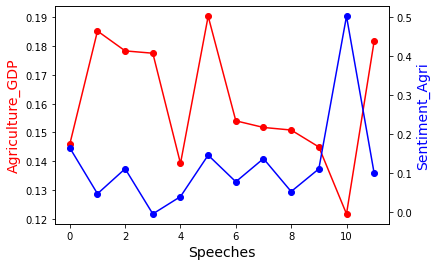

<Figure size 432x288 with 0 Axes>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_gdp_selected.index, df_gdp_selected['Sum of Agriculture & allied activities'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Speeches",fontsize=14)
# set y-axis label
ax.set_ylabel("Agriculture_GDP",color="red",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_gdp_selected.index, df_industry['Agriculture'],color="blue",marker="o")
ax2.set_ylabel("Sentiment_Agri",color="blue",fontsize=14)
plt.show()



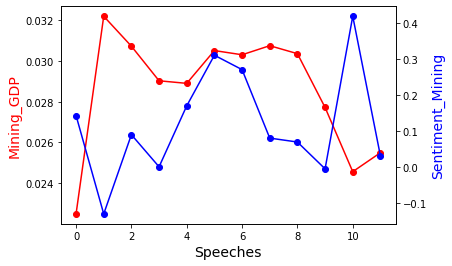

In [0]:
fig,ax = plt.subplots()
ax.plot(df_gdp_selected.index, df_gdp_selected['Sum of Mining & Quarrying'], color="red", marker="o")
ax.set_xlabel("Speeches",fontsize=14)
ax.set_ylabel("Mining_GDP",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(df_gdp_selected.index, df_industry['Mining'],color="blue",marker="o")
ax2.set_ylabel("Sentiment_Mining",color="blue",fontsize=14)
plt.show()

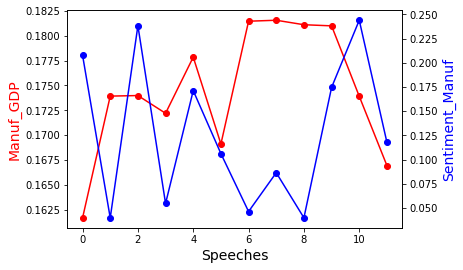

In [0]:
fig,ax = plt.subplots()
ax.plot(df_gdp_selected.index, df_gdp_selected['Sum of Manufacturing'], color="red", marker="o")
ax.set_xlabel("Speeches",fontsize=14)
ax.set_ylabel("Manuf_GDP",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(df_gdp_selected.index, df_industry['Manufacturing'],color="blue",marker="o")
ax2.set_ylabel("Sentiment_Manuf",color="blue",fontsize=14)
plt.show()

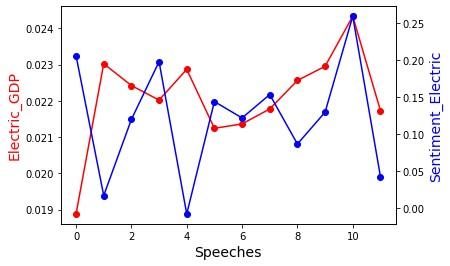

In [0]:
fig,ax = plt.subplots()
ax.plot(df_gdp_selected.index, df_gdp_selected['Sum of Electricity, Gas & Water Supply'], color="red", marker="o")
ax.set_xlabel("Speeches",fontsize=14)
ax.set_ylabel("Electric_GDP",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(df_gdp_selected.index, df_industry['Electricity_Gas_Water'],color="blue",marker="o")
ax2.set_ylabel("Sentiment_Electric",color="blue",fontsize=14)
plt.show()

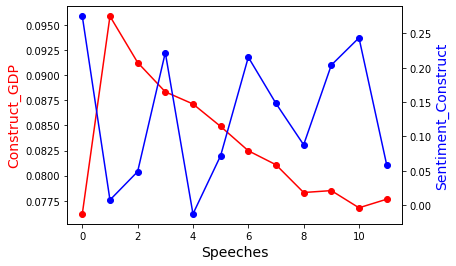

In [0]:
fig,ax = plt.subplots()
ax.plot(df_gdp_selected.index, df_gdp_selected['Sum of Construction'], color="red", marker="o")
ax.set_xlabel("Speeches",fontsize=14)
ax.set_ylabel("Construct_GDP",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(df_gdp_selected.index, df_industry['Construction'],color="blue",marker="o")
ax2.set_ylabel("Sentiment_Construct",color="blue",fontsize=14)
plt.show()

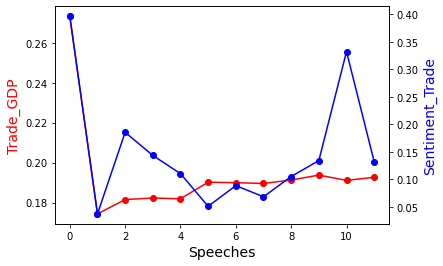

In [0]:
fig,ax = plt.subplots()
ax.plot(df_gdp_selected.index, df_gdp_selected['Sum of Trade, Hotel, Transport and Communications'], color="red", marker="o")
ax.set_xlabel("Speeches",fontsize=14)
ax.set_ylabel("Trade_GDP",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(df_gdp_selected.index, df_industry['Trade_Hotel_Transport_Communications'],color="blue",marker="o")
ax2.set_ylabel("Sentiment_Trade",color="blue",fontsize=14)
plt.show()

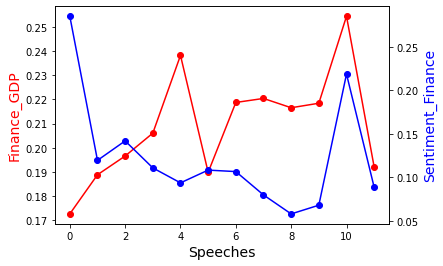

In [0]:
fig,ax = plt.subplots()
ax.plot(df_gdp_selected.index, df_gdp_selected['Sum of Finance, Insurance, Real Estate & Business Services'], color="red", marker="o")
ax.set_xlabel("Speeches",fontsize=14)
ax.set_ylabel("Finance_GDP",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(df_gdp_selected.index, df_industry['Finance_Insurance_Real_Estate_Business_Services'],color="blue",marker="o")
ax2.set_ylabel("Sentiment_Finance",color="blue",fontsize=14)
plt.show()

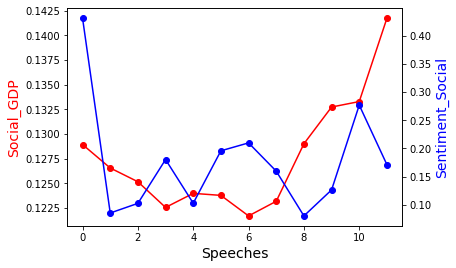

In [0]:
fig,ax = plt.subplots()
ax.plot(df_gdp_selected.index, df_gdp_selected['Sum of Community, Social & Personal Services'], color="red", marker="o")
ax.set_xlabel("Speeches",fontsize=14)
ax.set_ylabel("Social_GDP",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(df_gdp_selected.index, df_industry['Community_Social_Personal_Services'],color="blue",marker="o")
ax2.set_ylabel("Sentiment_Social",color="blue",fontsize=14)
plt.show()

In [0]:
Speech_df

,Finance_Minister,Date,Speech,Speech_clean,sentiment_vadar
0,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budget i...",interim regular economy grave uncertainties Gr...,-0.7506
1,Pranab Mukherjee,"February 26, 2010","2. It was not clear to us, as also to...",not us policy makers many countries crisis eve...,-0.7650
2,Pranab Mukherjee,"February 26, 2010","3. At home, there was added uncertain...",At home added uncertainty account delayed sub ...,-0.5719
3,Pranab Mukherjee,"February 26, 2010","4. Today, as I stand before you, I ca...",stand say confidence weathered crises well eco...,0.7951
4,Pranab Mukherjee,"February 26, 2010",5. The three challenges and the mediu...,three challenges medium term perspective outli...,0.4019
...,...,...,...,...,...
272,Nirmala Sitharaman,"July, 5, 2019","(a) Food items such as chikki, chutney powder ...",Food items chikki chutney powder b Fly ash fly...,-0.7783
273,Nirmala Sitharaman,"July, 5, 2019","(a) Walnuts, tamarind dried, roasted gram, man...",Walnuts tamarind dried roasted gram mangoes sl...,0.8481
274,Nirmala Sitharaman,"July, 5, 2019",(a) Rough industrial diamonds including unsort...,Rough industrial diamonds including unsorted r...,0.9337
276,Nirmala Sitharaman,"July, 5, 2019",(a) Services by way of admission to entertainm...,Services way admission entertainment events am...,0.6486




---



#Classification - Traditional Algorithms

You will find Deep Learning models including LSTM in an another notebook

In [0]:
df_selected = Speech_df[['Speech_clean',	'sentiment_vadar']]

In [0]:
pip install docx2txt


In [0]:
import docx2txt

In [0]:
# read in word file
df_2020 = docx2txt.process("/content/drive/My Drive/Projects/Capstone Project/DATA/budget_speech 2020.docx")

In [0]:
df_2020

'CONTENTS\n\nPART-A\n\nPage No.\n\nIntroduction\t\t\t\t\t\t\t\t\t1\n\nAspirational India\t\t\t\t\t\t\t\t6\n\nAgriculture, Irrigation & Rural Development\t\t\t\t\t\t                             \n\nWellness, Water & Sanitation \t\t\t\t\t\t\t\t\n\nEducation & Skills \t\t\t\t\t\t\t\t\t\n\nEconomic Development  \t\t\t\t\t\t\t12\n\nIndustry, Commerce & Investment \t\t\t\t\t\t\t\n\nInfrastructure \t\t\t\t\t\t\t\t\t\t\n\nNew Economy \t\t\t\t\t\t\t\t\t\t\n\nCaring Society\t\t\t\t\t\t\t\t\t19\n\nWomen, Child  & Social Welfare \t\t\t\t\t\t\t\n\nCulture & Tourism \t\t\t\t\t\t\t\t\t\n\nEnvironment & Climate Change \t\t\t\t\t\t\t\t\n\nGovernance \t\t\t\t\t\t\t\t\t23\n\nFinancial Sector \t\t\t\t\t\t\t\t25\n\nFinancial Markets \t\t\t\t\t\t\t\t\t\n\nInfrastructure Financing  \t\t\t\t\t\t\t\t\n\nDisinvestment \t\t\t\t\t\t\t\t\n\nFiscal Management \t\t\t\t\t\t\t\t29\n\n(ii)\n\n\n\nPART B\n\nDirect \t\t\t\t\t\t\t\t\t            32\n\nPersonal Income Tax and simplification of taxation \t\t\t\t\t\n\nDivide

In [0]:
import re
df_2020 = re.sub('\s+', ' ', df_2020)
df_2020= df_2020.split("2020-2021. Introduction",1)[1] 

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.tokenize import sent_tokenize
list_2020= sent_tokenize(df_2020)

In [0]:
df_2020_selected = pd.DataFrame(list_2020, columns=['Speech'])

In [0]:
lemmatizer = WordNetLemmatizer()
clear_sentence=[]

for sentence in df_2020_selected.Speech: 
  sentence_1 = re.sub(r'[^A-Za-z]+', ' ', str(sentence))
  word_tokens = word_tokenize(sentence_1) 
  filtered_sentence = [w for w in word_tokens if not w in add_stop_words] 
  filtered_sentence = lemmatizer.lemmatize(' '.join(filtered_sentence))
  clear_sentence.append(filtered_sentence)

df_2020_selected['Speech_clean'] = clear_sentence


In [0]:
df_2020_selected['Speech_clean'].replace('', np.nan, inplace=True)
df_2020_selected.dropna(subset=['Speech_clean'], inplace=True)
df_2020_selected

,Speech,Speech_clean
0,"In May 2019, Prime Minister Modi received a m...",May Modi received massive mandate form
1,"With renewed vigour, under his leadership, we ...",With renewed vigour leadership commit serve pe...
3,People of India have unequivocally given their...,People unequivocally jan aadesh not political ...
4,This is the Budget to boost their incomes and ...,boost incomes enhance purchasing power
5,Only through higher growth we can achieve that...,Only higher growth achieve youth gainfully mea...
...,...,...
1127,3 The refund of accumulated credit of compensa...,refund accumulated credit compensation cess to...
1128,3/2019- Compensation Cess (Rate) dated 30.9.2019.,Compensation Cess Rate dated
1129,This notification is being given retrospective...,notification retrospective effect onwards
1130,"Accordingly, no refund on account of inverted ...",Accordingly refund account inverted structure ...


In [0]:
sentiment=[]
for sentence in df_2020_selected.Speech_clean:
  sentiment.append(analyser.polarity_scores(sentence)['compound'])

df_2020_selected['sentiment_vadar']=sentiment

In [0]:
df_2020_selected

,Speech,Speech_clean,sentiment_vadar
0,"In May 2019, Prime Minister Modi received a m...",May Modi received massive mandate form,0.0000
1,"With renewed vigour, under his leadership, we ...",With renewed vigour leadership commit serve pe...,0.4767
3,People of India have unequivocally given their...,People unequivocally jan aadesh not political ...,0.4215
4,This is the Budget to boost their incomes and ...,boost incomes enhance purchasing power,0.4019
5,Only through higher growth we can achieve that...,Only higher growth achieve youth gainfully mea...,0.3818
...,...,...,...
1127,3 The refund of accumulated credit of compensa...,refund accumulated credit compensation cess to...,0.1027
1128,3/2019- Compensation Cess (Rate) dated 30.9.2019.,Compensation Cess Rate dated,0.0000
1129,This notification is being given retrospective...,notification retrospective effect onwards,0.0000
1130,"Accordingly, no refund on account of inverted ...",Accordingly refund account inverted structure ...,0.0000


In [0]:
cat_list=[]
for value in df_2020_selected.sentiment_vadar: 
  if value > 0:  
    cat_list.append('1')

  if value < 0:  
    cat_list.append('2')

  if value == 0:  
    cat_list.append('0')


df_2020_selected['cat'] = cat_list

In [0]:
## For previous speeches
cat_list=[]
for value in Speech_df.sentiment_vadar: 
  if value > 0:  
    cat_list.append('1')

  if value < 0:  
    cat_list.append('2')

  if value == 0:  
    cat_list.append('0')

Speech_df['cat'] = cat_list

In [0]:
Speech_df.groupby('cat').size()


cat
0    9656
1    5220
2    1349
dtype: int64

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

text_counts= vectorizer.fit_transform(Speech_df.Speech_clean)
text_counts_2020= vectorizer.transform(df_2020_selected.Speech_clean)

In [0]:
### Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, Speech_df.cat, test_size=0.3, random_state=45)

In [0]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import fbeta_score
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
print("MultinomialNB F1:",metrics.f1_score(y_test, predicted, average='weighted'))
print("MultinomialNB F0.5:",fbeta_score(y_test, predicted, average='weighted', beta=0.5))


MultinomialNB Accuracy: 0.8412078882497945
MultinomialNB F1: 0.8363650593935036
MultinomialNB F0.5: 0.8374796868278827


In [0]:
predicted_2020= clf.predict(text_counts_2020)
print("MultinomialNB Accuracy:",metrics.accuracy_score(predicted_2020, df_2020_selected.cat))
print("MultinomialNB F1:",metrics.f1_score(predicted_2020, df_2020_selected.cat, average='weighted'))
print("MultinomialNB F0.5:",fbeta_score(predicted_2020, df_2020_selected.cat, average='weighted', beta=0.5))

MultinomialNB Accuracy: 0.7681007345225603
MultinomialNB F1: 0.7818382270794515
MultinomialNB F0.5: 0.7955335271710833


#RF

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
print("RF accuracy",metrics.accuracy_score(y_test, predicted))
print("RF F1 Score",metrics.f1_score(y_test, predicted, average='weighted'))
print("RF F0.5:",fbeta_score(y_test, predicted, average='weighted', beta=0.5))

RF accuracy 0.9348808545603944
RF F1 Score 0.932178050848553
RF F0.5: 0.9329146560909916


In [0]:
predicted_2020= rf.predict(text_counts_2020)
print("RF Accuracy:",metrics.accuracy_score(predicted_2020, df_2020_selected.cat))
print("RF F1:",metrics.f1_score(predicted_2020, df_2020_selected.cat, average='weighted'))
print("RF F0.5:",fbeta_score(predicted_2020, df_2020_selected.cat, average='weighted', beta=0.5))

RF Accuracy: 0.9045120671563484
RF F1: 0.907846557420718
RF F0.5: 0.9130837665286833


#XGBoost

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV

In [0]:
xgb_model = XGBClassifier()
optimization_dict = {'max_depth': [2,4,6,None],
                     'n_estimators': [50,100,200,None]}

In [0]:
model = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='accuracy', verbose=1)

In [0]:
model.fit(X_train, y_train)
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'NoneType' object cannot be interpreted as an integer

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: Invalid Parameter format for max_depth expect int but value='None'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.1min finished


0.8615832434058335
{'max_depth': 6, 'n_estimators': 200}


In [0]:
pred=model.predict(X_test)
print("XGBoost accuracy",metrics.accuracy_score(y_test, pred))
print("XGBoost F1 Score",metrics.f1_score(y_test, pred, average='weighted'))
print("XGBoost F0.5:",fbeta_score(y_test, pred, average='weighted', beta=0.5))

XGBoost accuracy 0.8514790468364831
XGBoost F1 Score 0.8412344199740589
XGBoost F0.5: 0.850129804731633


In [0]:
predicted_2020= model.predict(text_counts_2020)
print("XGBoost Accuracy:",metrics.accuracy_score(predicted_2020, df_2020_selected.cat))
print("XGBoost F1:",metrics.f1_score(predicted_2020, df_2020_selected.cat, average='weighted'))
print("XGBoost F0.5:",fbeta_score(predicted_2020, df_2020_selected.cat, average='weighted', beta=0.5))

XGBoost Accuracy: 0.782791185729276
XGBoost F1: 0.7890275613877024
XGBoost F0.5: 0.8188169334460657




---



---



In [0]:
####Using TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
count_tfidf=tfidf_vectorizer.fit_transform(Speech_df.Speech_clean)
count_tfidf_2020=tfidf_vectorizer.transform(df_2020_selected.Speech_clean)

In [0]:
### Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    count_tfidf, Speech_df.cat, test_size=0.3, random_state=45)

In [0]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8032046014790468


In [0]:
predicted_2020= clf.predict(count_tfidf_2020)
print("MultinomialNB Accuracy:",metrics.accuracy_score(predicted_2020, df_2020_selected.cat))
print("MultinomialNB F1:",metrics.f1_score(predicted_2020, df_2020_selected.cat, average='weighted'))

MultinomialNB Accuracy: 0.6820566631689402
MultinomialNB F1: 0.7173684436506631




---



---



# Correlation with Topic Modeling 

In [0]:
speech_df.head()

,Finance_Minister,Date,Speech,Speech_clean
0,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budget i...",interim regular economy grave uncertainties Gr...
1,Pranab Mukherjee,"February 26, 2010","2. It was not clear to us, as also to...",not us policy makers many countries crisis eve...
2,Pranab Mukherjee,"February 26, 2010","3. At home, there was added uncertain...",At home added uncertainty account delayed sub ...
3,Pranab Mukherjee,"February 26, 2010","4. Today, as I stand before you, I ca...",stand say confidence weathered crises well eco...
4,Pranab Mukherjee,"February 26, 2010",5. The three challenges and the mediu...,three challenges medium term perspective outli...


In [0]:
speech_df['Finance_Minister'].unique()

array(['Pranab Mukherjee', 'P. Chidambaram', 'Arun Jaitley',
       'Piyush Goyal', 'Nirmala Sitharaman'], dtype=object)

Cleaning date field  

In [0]:
mapping_data = {
"Date": {
"February 1, 2018   Section I Governance, Economy and Development": "February 1, 2018"
}
}
speech_df = speech_df.replace(mapping_data)

In [0]:
speech_df['Date'].unique()

array(['February  26,  2010', 'February 28, 2011', 'March 16, 2012',
       'February 28, 2013', 'July 10, 2014', 'February 1, 2018',
       'February 1, 2017', 'February 17, 2014', 'February 28, 2015',
       'February 29, 2016', 'February 1, 2019', 'July, 5, 2019'],
      dtype=object)

1. Tokenization
2. Removing stop words
3. Lemmatization



In [0]:
from gensim.utils import tokenize
from gensim.parsing.preprocessing import remove_stopwords
import nltk
from nltk.corpus import stopwords  
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english')) 
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
k = 0
filtered_sentence = [] 
final_sentence=[]
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 
#allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

for line in speech_df.Speech_clean:
  line=lemmatizer.lemmatize(line) 
  word_tokens = word_tokenize(line)
  filtered_sentence = [] 
  for w in word_tokens: 
    if w.isalnum(): #considering only Alpha-numberic charachters 
      if w not in stop_words: 
         #if w.pos_ in allowed_postags: 
          filtered_sentence.append(w)
      
  final_sentence.append(' '.join(filtered_sentence))
  
speech_df['Lema_Speech'] = final_sentence

In [0]:
speech_df['Lema_Speech'].head()

0    interim regular economy grave uncertainties Gr...
1    us policy makers many countries crisis eventua...
2    At home added uncertainty account delayed sub ...
3    stand say confidence weathered crises well eco...
4    three challenges medium term perspective outli...
Name: Lema_Speech, dtype: object

Grouping data by Speech date

In [0]:
date_group_df=speech_df.groupby('Date')


## Topic modeling using LatentDirichletAllocation from sklearn

In [0]:


from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Preparing keywords list for each sector

In [0]:
Agriculture_allied_activities=['irrigation','agriculture','cultivation','husbandry','horticulture','crop','biofuel','farm','animal husbandry','farming','cultivate','agribusiness','food','domestication','agricultural','manure','tillage','monoculture','forestry','livestock','harvest','agronomy','pesticide','wool','neolithic revolution','cotton','wheat','crop rotation','dairy','aquaculture','overcrop','hydroponics','raw material','genetically modified organism','farmer','breeding','arboriculture','climate','plow','fields']
Mining_Quarrying=['copper','mineral','metal','coal mining','prospecting','potash','coal','gold','fire-setting','landfill','flint','ore','silver','vein','france','metallurgy','surface mining','turquoise','sodium chloride','metals','aqueduct','sluice','lead','spain','ancient egypt','bauxite','smelting','tailings','underground mining','placer mining','open-pit mining','material','lode','gemstone','limestone','gravel','clay']
Manufacturing=['industry','fabrication','make','produce','product','machine','invent','production','create','use','design','fabricate','construct','manufacturing','concoct','make up','cook  up','raw material','automobiles','industrialization','manufacturer','manufacturers','factory','producing','products','used','plant','handicraft','processing','packaging','supplier','importation','import','procure','brand','tool','hatch','formation','rat','privatize','business',
'industrialisation']
Electricity_Gas_Water_Supply=['tariff','main','stove','discharge','escape','discharged','discharging','lamp','neon','plasma','xenon','tap','trap','trapped','trapping','cutoff','cooking','polarizing','escaped','grid','ionization','thermostat','stratification','polarized','generate','electrode','cooker','self-starter','polarize','magnetohydrodynamic','voltameter','burn','cascade','cascades','condenser','current','cycle','diffuser','efficiency','electron','engine','feeder','filter','flash','fuel','gas','generator','electriccity','water']
Construction=['building','infrastructure','structure','design','planning','housing','factory','erection','industry','carpentry','fabrication','business','engineering','interpretation','renovation','project','built','architecture','development','buildings','manufacturing','installation','facility','new','expression','twist','colonnade','masonry','balcony','shelter','cities','mental synthesis','bridge','shipbuilding','complex','rebuild']
Hotel_Transport=['transportation','reservation','traffic','tariff','input','circulation','page','carry','ticket','connection','admission','entry','feedback','start','artery','channel','answering','concentration','retreat','answer','channels','drop','rates','station','services','serve','drive','move','export','reception','reckoning','service','receipts','receipt','equipment','business','trades','atm','stand','bring','commission','siege']
Finance_Insurance=['finance','insurance','property','land','security','area','tenure','dower','lease','agent','mortgage','landes','bist','bust','busting','asset','bubble','warranty','life','freehold','tenant','invest','mortgaging','rental','possibility','development','housing','law','abandonment','option','agents','buy','heir','lien','purchase','realize','gain','gaining','foreclosure','license','reality','leaseback','realty','developer','acre','lots','lot','landed']
Social_Personal=['society','public','colony','environment','bohemia','ethos','owen','democratic','state','states','welfare','democracy','proletariat','canteen','unitarian','comity','etiquette','kibbutz','law','mobile','communalism','lof','neuter','socal','oreo','pantisocracy','roman-fleuve','sarvodaya','societal','socialism','services','underprivileged','party','tribe','meeting','civilize','collegium','commonalty']

In [0]:
dateList = pd.Series([])
topicList = pd.Series([])
categoryList = pd.Series([])
nameList = pd.Series([])
date=""
topicName=""
category=""
k=0


for Name, group in date_group_df:   
     ## Top 10 words
     
     def plot_10_most_common_words(count_data, count_vectorizer):    
        words = count_vectorizer.get_feature_names()
        total_counts = np.zeros(len(words))
        for t in count_data:
            total_counts+=t.toarray()[0]
        
        count_dict = (zip(words, total_counts))
        count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
        words = [w[0] for w in count_dict]
        counts = [w[1] for w in count_dict]
        x_pos = np.arange(len(words)) 
        
        plt.figure(2, figsize=(15, 15/1.6180))
        plt.subplot(title='10 most common words==>'+Name)
        sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
        sns.barplot(x_pos, counts, palette='husl')
        plt.xticks(x_pos, words, rotation=90) 
        plt.xlabel('words')
        plt.ylabel('counts')
        plt.show()
    # Initialise the count vectorizer with the English stop words
     count_vectorizer = CountVectorizer(stop_words='english')
    # Fit and transform the speech
     count_data = count_vectorizer.fit_transform(group['Lema_Speech'])
    # Visualise the 10 most common words
    # plot_10_most_common_words(count_data, count_vectorizer)

     ## LDA Part
       # Helper function
     wrdWeight=0
     def print_topics(model, count_vectorizer, n_top_words):
        words = count_vectorizer.get_feature_names()
        for topic_idx, topic in enumerate(model.components_):
            #wrdWeight=wrdWeight+round(topic[i], 2)
            global k
            #print("\nTopic #%d:" % topic_idx ) 
            #print("\nTopic weight #%d:" % topic_word_prior )  
            # only message           
            #print(" ".join([words[i]
                         #   for i in topic.argsort()[:-n_top_words - 1:-1]]))
            message = "Topic #%d: " % topic_idx
            message += " ".join([words[i] + " (" + str(round(topic[i], 2)) + ")"
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
          
            topic=message
            if re.compile('|'.join(Agriculture_allied_activities),re.IGNORECASE).search(str(topic)): #re.IGNORECASE is used to ignore case
              category="Agriculture"
            elif re.compile('|'.join(Mining_Quarrying),re.IGNORECASE).search(str(topic)): #re.IGNORECASE is used to ignore case
              category="Mining"
            elif re.compile('|'.join(Manufacturing),re.IGNORECASE).search(str(topic)): #re.IGNORECASE is used to ignore case
              category="Manufacturing"
            elif re.compile('|'.join(Electricity_Gas_Water_Supply),re.IGNORECASE).search(str(topic)): #re.IGNORECASE is used to ignore case
              category="Electricity_Gas_Water_Supply"
            elif re.compile('|'.join(Construction),re.IGNORECASE).search(str(topic)): #re.IGNORECASE is used to ignore case
              category="Construction"
            elif re.compile('|'.join(Hotel_Transport),re.IGNORECASE).search(str(topic)): #re.IGNORECASE is used to ignore case
              category="Hotel_Transport"
            elif re.compile('|'.join(Finance_Insurance),re.IGNORECASE).search(str(topic)): #re.IGNORECASE is used to ignore case
              category="Finance_Insurance"
            elif re.compile('|'.join(Social_Personal),re.IGNORECASE).search(str(topic)): #re.IGNORECASE is used to ignore case
              category="Social_Personal"
            else:
            # Do Something else if word is not present
              category="Generic"
              
            k=k+1  

            dateList[k]=Name
            topicList[k]=("Topic"+str((topic_idx+1)))
            categoryList[k]=category
            nameList[k]=group['Finance_Minister'].unique()
        #model.print_topics()
             
    # Tweak the two parameters below
     number_topics = 8
     number_words = 10
    # Create and fit the LDA model
     lda = LDA(n_components=number_topics, n_jobs=-1)
     lda.fit(count_data)
    # Print the topics found by the LDA model
    # print("Topics found via LDA: " + Name)
     print_topics(lda, count_vectorizer, number_words)     
topicDf1   =pd.DataFrame({"Date":dateList,"SpeakerName":nameList,"TopicName":topicList,"Sector":categoryList});  


Date frame results with topic , speaker name and date

In [0]:
topicDf1

,Date,SpeakerName,TopicName,Sector
1,"February 26, 2010",[Pranab Mukherjee],Topic1,Manufacturing
2,"February 26, 2010",[Pranab Mukherjee],Topic2,Manufacturing
3,"February 26, 2010",[Pranab Mukherjee],Topic3,Agriculture
4,"February 26, 2010",[Pranab Mukherjee],Topic4,Construction
5,"February 26, 2010",[Pranab Mukherjee],Topic5,Social_Personal
...,...,...,...,...
92,"March 16, 2012",[Pranab Mukherjee],Topic4,Mining
93,"March 16, 2012",[Pranab Mukherjee],Topic5,Construction
94,"March 16, 2012",[Pranab Mukherjee],Topic6,Agriculture
95,"March 16, 2012",[Pranab Mukherjee],Topic7,Agriculture


In [0]:
#dateGroupDF=topicDf1.groupby('Date',as_index=False).agg({"Sector":np.sum})

In [0]:
#dateGroupDF

Topic count's by each speaker

In [0]:
#topicDf1.groupby(['Date','Category'],as_index=False).size()
ctgrGrpDf=topicDf1.groupby(['Date','Sector']).size().reset_index(name='counts')

ctgrGrpDf.head()
#df.plot(kind='bar',x='name',y='age')


,Date,Sector,counts
0,"February 26, 2010",Construction,1
1,"February 26, 2010",Finance_Insurance,1
2,"February 26, 2010",Generic,2
3,"February 26, 2010",Hotel_Transport,1
4,"February 26, 2010",Manufacturing,2


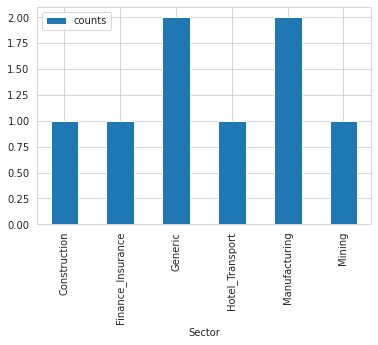

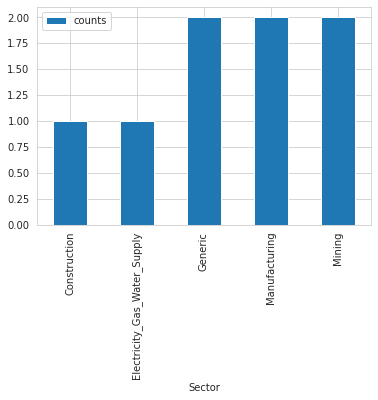

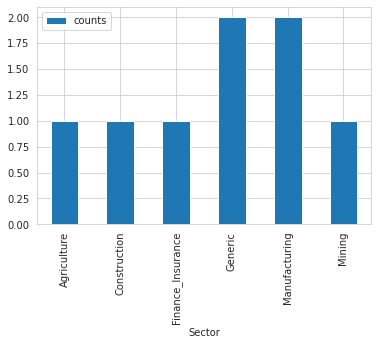

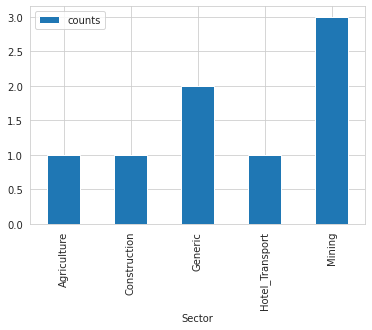

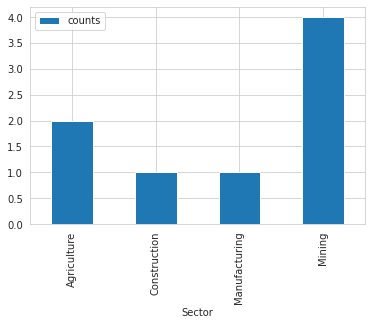

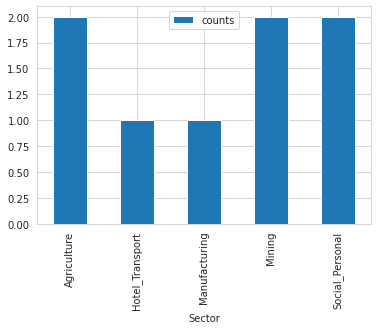

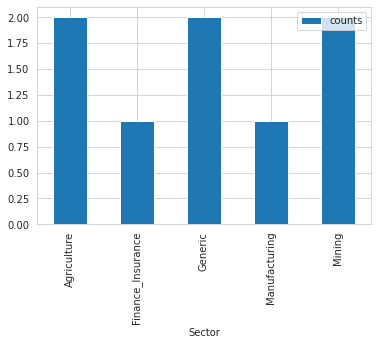

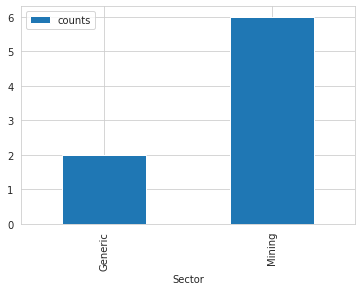

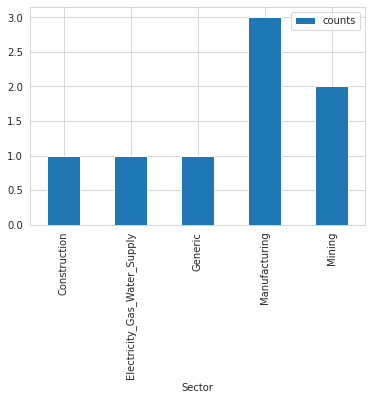

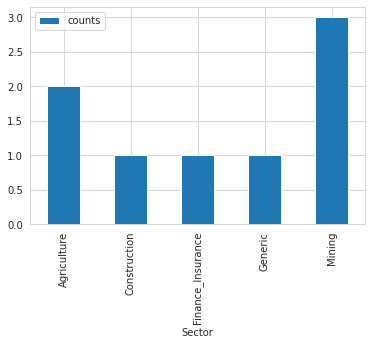

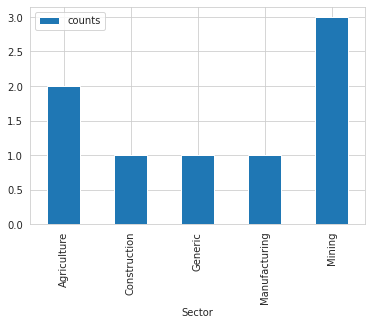

In [0]:

dtctgrGrpDf=ctgrGrpDf.groupby('Date')
for Name, group in dtctgrGrpDf: 
    #print(group['counts']) 
    group.plot(kind='bar',x='Sector',y='counts')
    

In [0]:
pip install pyLDAvis


     |████████████████████████████████| 1.6MB 5.1MB/s 
     |████████████████████████████████| 552kB 45.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=df1709f2d8d07e894fa80d3bea825421a36821b3b39924b5d39fd79a0b03e493
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=12bcc728854953949c3f2d5e2552c11ad46e5fd026cc330b2c345d0bfeaf8cae
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


## Topic Modeling using Gensim

In [0]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 2.8MB/s 


Preparing custom keywords list for each sector

In [0]:
Agriculture_allied_activities=['irrigation','agriculture','cultivation','husbandry','horticulture','crop','biofuel','farm',
                               'animal husbandry','farming','cultivate','agribusiness','food','domestication','agricultural','manure',
                               'tillage','monoculture','forestry','livestock','harvest','agronomy','pesticide','wool','neolithic revolution',
                               'cotton','wheat','crop rotation','dairy','aquaculture','overcrop','hydroponics','raw material','genetically modified organism',
                               'farmer','breeding','arboriculture','climate','plow','fields','Agribusiness','Biodiversity','Climate',
                               'Double or Multiple Cropping','High-tech Farming','Agriculture','Machinery', 'Produces', 'Storage', 'Marketing', 'Prices', 
              'Animal', 'Husbandry', 'Certification', 'Gradation', 'Crops', 'Dairy', 
              'Fertilizers', 'Pesticides', 'Fisheries', 'Floriculture', 'Horticulture', 
              'Irrigation', 'Organic Farming', 'Plant', 'Seeds','Sericulture' ,
              'Soil', 'Weather','vegetable' ]


Mining_Quarrying=['copper','mineral','metal','coal mining','prospecting','potash','coal',
                  'gold','fire-setting','landfill','flint','ore','silver','vein','france','metallurgy','surface mining','turquoise','sodium chloride','metals',
                  'aqueduct','sluice','lead','spain','ancient egypt','bauxite','smelting','tailings','underground mining','placer mining','open-pit mining','material',
                  'lode','gemstone','limestone','gravel','clay','Mining', 'Mines', 'exploration ', 'mineral', 'natural gas', 'petroleum','atomic', 'metallurgy', 'aluminium', 
                  'copper', 'zinc', 'gold', 'nickel', 'Diamonds','steel','petrol','iron']


Manufacturing=['industry','fabrication','make','produce','product','machine','invent','production','create','use','design','fabricate','construct','manufacturing','concoct','make up','cook  up','raw material','automobiles','industrialization','manufacturer','manufacturers','factory','producing','products','used','plant','handicraft','processing','packaging','supplier','importation','import','procure','brand','tool','hatch','formation','rat','privatize','business',
'industrialisation','Manufacturing','food products', 'metals', 'rubber', 'petrochemicals', 'chemicals', 'electrical machinery', 
                 'Tobacco', 'Textiles', 'apparel', 'Leather', 'wood', 'paper', 'coke', 'non-metallic', 'mineral', 'Machinery',
                 'equipment', 'Motor vehicles', 'transport equipment', 'Furniture','cigarettes']


Electricity_Gas_Water_Supply=['tariff','main','stove','discharge','escape','discharged','discharging','lamp','neon','plasma','xenon','tap','trap','trapped',
                              'trapping','cutoff','cooking','polarizing','escaped','grid','ionization','thermostat','stratification','polarized','generate','electrode','cooker',
                              'self-starter','polarize','magnetohydrodynamic','voltameter','burn','cascade','cascades','condenser','current','cycle','diffuser','efficiency','electron',
                              'engine','feeder','filter','flash','fuel','gas','generator','electriccity','water','power','electricity','solar energy','solar','renewable energy',
                              'wind energy','green energy','energy conservation','Power', 'Energy', 'Coal', 'Conservation of Energy', 'Petroleum', 'Natural Gas', 'Power', 'Renewable Energy', 
                                 'water', 'clean', 'gas', 'lpg', 'food', 'cooking gas', 'Oil & Natural Gas', 'refining', 'distribution', 
                                 'petroleum products','Bio-fuels']

Construction=['building','infrastructure','structure','design','planning','housing','factory','erection','industry','carpentry','fabrication',
              'business','engineering','interpretation','renovation','project','built','architecture','development','buildings','manufacturing','installation',
              'facility','new','expression','twist','colonnade','masonry','balcony','shelter','cities','mental synthesis','bridge','shipbuilding','complex','rebuild','Infrastructure', 'Power', 'Bridges', 'Dams', 'Roads', 'Urban', 'Housing', 'EWS', 'Rural']


Hotel_Transport=['transportation','reservation','traffic','tariff','input','circulation','page','carry','ticket','connection','admission','entry','feedback',
                 'start','artery','channel','answering','concentration','retreat','answer','channels','drop','rates','station','services','serve','drive',
                 'move','export','reception','reckoning','service','receipts','receipt','equipment','business','trades','atm','stand','bring','commission','siege','Commerce','Export', 'Import', 'SEZ', 'Trade', 'Promotion', 'Communication', 'Information', 'Technology', 'Post', 'Telecom','Information'
                                      ,'Broadcasting', 'Film', 'Print',  'Media', 'Transport', 'Aviation', 'Metro', 'Railways', 'Surface Transport', 'Water Ways',
                                      'Travel', 'Tourism', 'Places', 'Accommodation', 'Approved Agents']


Finance_Insurance=['finance','insurance','property','land','security','area','tenure','dower','lease','agent','mortgage','landes','bist','bust',
                   'busting','asset','bubble','warranty','life','freehold','tenant','invest','mortgaging','rental','possibility','development',
                   'housing','law','abandonment','option','agents','buy','heir','lien','purchase','realize','gain','gaining','foreclosure',
                   'license','reality','leaseback','realty','developer','acre','lots','lot','landed','Equity','Insurance','Investment','mortgage','Finance', 'Taxes', 'Insurance', 'Pension', 'Banking', 'Economy', 'Trade', 'Tax',
                                                     'Housing', 'EWS', 'Rural', 'Urban', 'Labour', 'Employment', 'Organized', 'Unorganized']


Social_Personal=['society','public','colony','environment','bohemia','ethos','owen','democratic','state','states','welfare','democracy',
                 'proletariat','canteen','unitarian','comity','etiquette','kibbutz','law','mobile','communalism','lof','neuter','socal',
                 'oreo','pantisocracy','roman-fleuve','sarvodaya','societal','socialism','services','underprivileged','party','tribe','meeting','civilize','collegium'
                 ,'commonalty','Governance', 'Administration', 'Constitution','Parliament', 'Legislature', 'Government', 
                                       'Grievances', 'Law', 'Justice', 'Judiciary', 'Dispute', 'Enactment', 'Institutions', 'Legal', 
                                       'Personal', 'Social', 'Backward Classes', 'Scheduled Castes', 'Children', 'Disabled', 'Minority', 
                                       'Community', 'Senior Citizen', 'Tribal', 'Women', 'Family', 'Welfare','Health', 'Police', 
                                       'Enforcement', 'Home Affairs','income','national','expenditure']

In [0]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer





 

1.   Applying LDA model to get the topics from speeches
2.   Checking out put topics with the custom key word list prepared for mapping the relavant topics
3.  Calculating sentiment for each topic of all speeches
4.  Preaparing data frame with Sepaker name , year , LDA topics,cutom topic and sentiment for further analysis



In [0]:
dateList = pd.Series([])
topicList = pd.Series([])
categoryList = pd.Series([])
nameList = pd.Series([])
modelTpcList=pd.Series([])
modelTpCSent=pd.Series([])
date=""
topicName=""
category=""
i=0
analyser = SentimentIntensityAnalyzer()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def topicVisualization(lda_model, corpus, id2word):
    # Visualize the topics
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    vis

for Name, group in date_group_df:
    #print(group['Lema_Speech'])   
    
    sp_df = list(sent_to_words(group['Lema_Speech']))

    #sp_df= [d.split() for d in group['Lema_Speech']]
   
    # Create Dictionary
    id2word = corpora.Dictionary(sp_df)

    # Create Corpus
    texts = sp_df
    

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=126,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    
    
    #for index, score in sorted(lda_model[corpus], key=lambda tup: -1*tup[1]):
        #topicScr="Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5))
        #print(topicScr)  

    for j in range(len(lda_model.print_topics())):
        topic=lda_model.print_topics()[j]
        topicSent=re.sub('[^a-zA-Z \n\.]', '', str(topic).replace(".",""))
        cleanSent=analyser.polarity_scores(topicSent)['compound']
       
        if re.compile('|'.join(Agriculture_allied_activities),re.IGNORECASE).search(str(topic)): 
           category="Agriculture"
        elif re.compile('|'.join(Mining_Quarrying),re.IGNORECASE).search(str(topic)): 
           category="Mining"
        elif re.compile('|'.join(Manufacturing),re.IGNORECASE).search(str(topic)): 
           category="Manufacturing"
        elif re.compile('|'.join(Electricity_Gas_Water_Supply),re.IGNORECASE).search(str(topic)): 
           category="Electricity_Gas_Water_Supply"
        elif re.compile('|'.join(Construction),re.IGNORECASE).search(str(topic)): 
           category="Construction"
        elif re.compile('|'.join(Hotel_Transport),re.IGNORECASE).search(str(topic)): 
           category="Hotel_Transport"
        elif re.compile('|'.join(Finance_Insurance),re.IGNORECASE).search(str(topic)): 
           category="Finance_Insurance"
        elif re.compile('|'.join(Social_Personal),re.IGNORECASE).search(str(topic)):          
           category="Social_Personal"
        else:
            # Do Something else if word is not present
            category="Generic"
        i=i+1    
        dateList[i]=Name
        topicList[i]=("Topic"+str((j+1)))
        categoryList[i]=category
        nameList[i]=group['Finance_Minister'].unique()
        modelTpcList[i]=str(topic)
        modelTpCSent[i]=cleanSent
    #doc_lda = lda_model[corpus]
    
topicDf =pd.DataFrame({"Date":dateList,"SpeakerName":nameList,"TopicName":topicList,"LDATopic":modelTpcList,"SntmntVal":modelTpCSent,"SectorType":categoryList});


In [0]:
topicDf

,Date,SpeakerName,TopicName,LDATopic,SntmntVal,SectorType
1,"February 26, 2010",[Pranab Mukherjee],Topic1,"(0, '0.031*""tax"" + 0.018*""services"" + 0.012*""c...",-0.4019,Agriculture
2,"February 26, 2010",[Pranab Mukherjee],Topic2,"(1, '0.024*""customs"" + 0.021*""basic"" + 0.016*""...",0.6249,Agriculture
3,"February 26, 2010",[Pranab Mukherjee],Topic3,"(2, '0.012*""petroleum"" + 0.011*""small"" + 0.010...",0.7717,Mining
4,"February 26, 2010",[Pranab Mukherjee],Topic4,"(3, '0.014*""fiscal"" + 0.012*""growth"" + 0.012*""...",0.3818,Manufacturing
5,"February 26, 2010",[Pranab Mukherjee],Topic5,"(4, '0.032*""exemption"" + 0.015*""full"" + 0.013*...",0.4767,Manufacturing
...,...,...,...,...,...,...
92,"March 16, 2012",[Pranab Mukherjee],Topic4,"(3, '0.122*""long"" + 0.119*""commend"" + 0.022*""i...",0.7783,Manufacturing
93,"March 16, 2012",[Pranab Mukherjee],Topic5,"(4, '0.117*""headlines"" + 0.115*""shaping"" + 0.1...",0.4404,Mining
94,"March 16, 2012",[Pranab Mukherjee],Topic6,"(5, '0.049*""tax"" + 0.030*""exemption"" + 0.026*""...",0.1027,Construction
95,"March 16, 2012",[Pranab Mukherjee],Topic7,"(6, '0.065*""basic"" + 0.056*""customs"" + 0.023*""...",0.1513,Agriculture


Grouping similar topics and adding sentiment values corresponding to it in each speech

In [0]:


sectorDf=topicDf.groupby(['Date','SectorType'],as_index=False).agg({"SntmntVal":np.sum})
#count of topics in each speech
sectorDf1=topicDf.groupby(['Date','SectorType']).size().reset_index(name='counts')
sectorDf2=sectorDf.groupby(['Date','SectorType'],as_index=False).agg({"SntmntVal":np.mean})


In [0]:
gnrcDf=topicDf.query('SectorType=="Generic"')

In [0]:
gnrcDf.to_csv(directory+"Other/Generic.csv")

  
 **Intially more than 10 topics listed as a generic ,added relevant words from these topics to custom coverage list and applied lda again as a results generic topics got reduced to 7 and then 2**
 
 

1.    (3, '0.025*"provisions" + 0.023*"number" + 0.020*"levy" + 0.014*"items" + 0.013*"extend" + 0.013*"scheme" + 0.013*"concessional" + 0.012*"due" + 0.012*"upto" + 0.011*"free"')
  
  
2.   (5, '0.055*"increased" + 0.028*"notifications" + 0.022*"itc" + 0.018*"respect" + 0.015*"first" + 0.014*"months" + 0.012*"short" + 0.010*"issued" + 0.010*"units" + 0.009*"come"')



Speech wise Sentiment Distribution for topics 

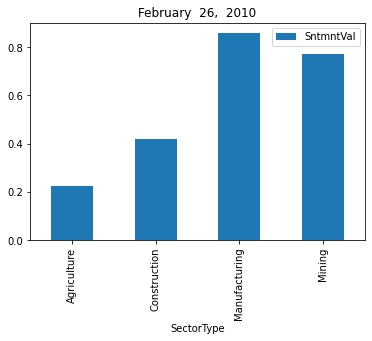

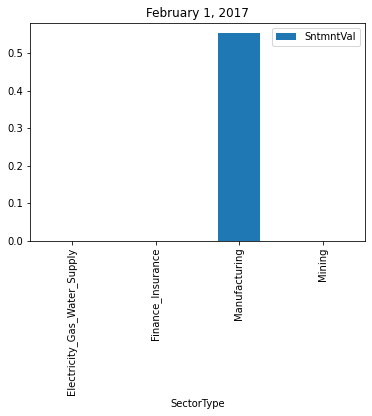

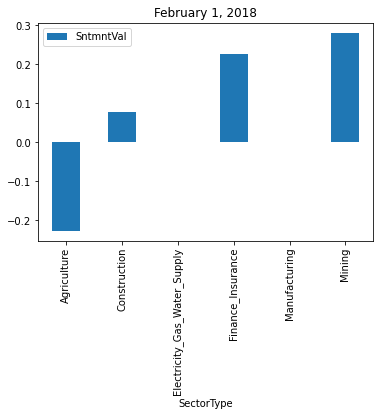

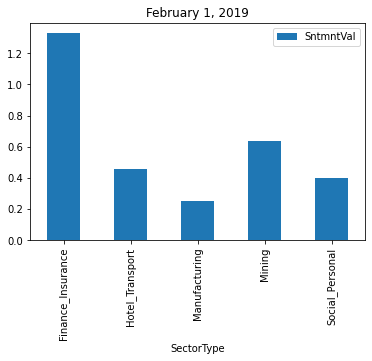

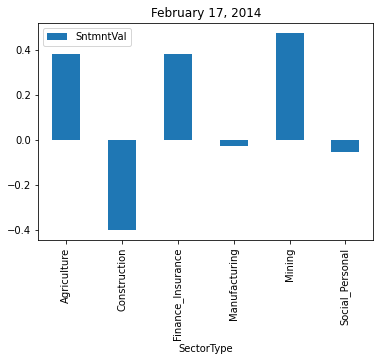

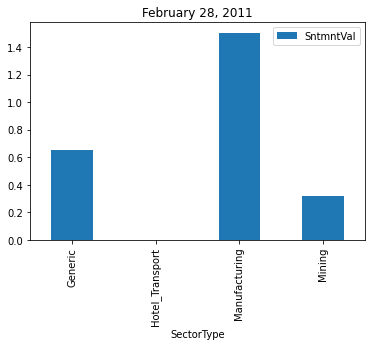

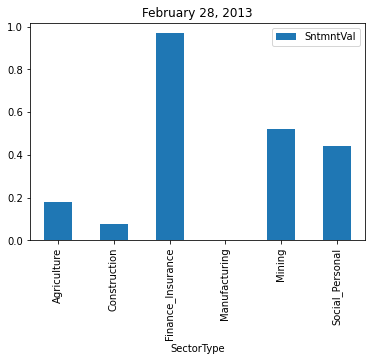

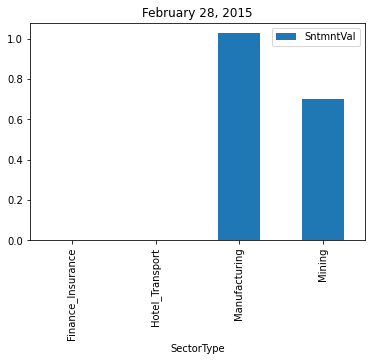

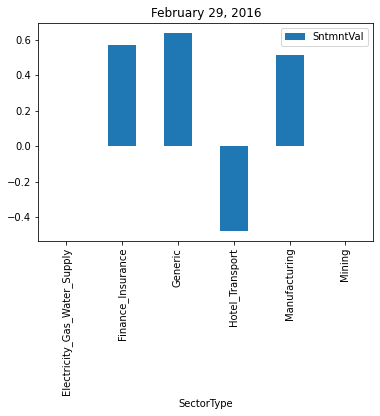

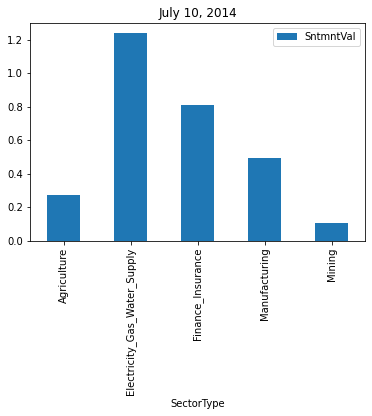

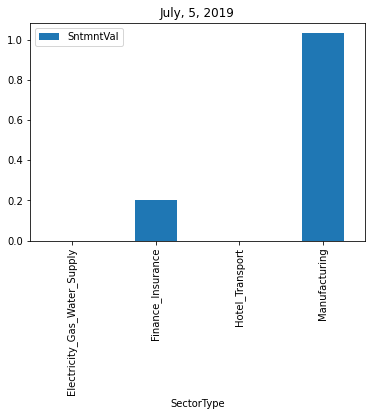

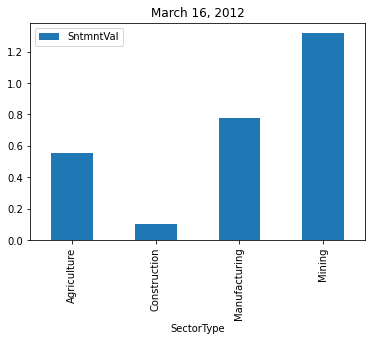

In [0]:
dtsectorDf1=sectorDf.groupby('Date')
for Name, group in dtsectorDf1:  
    group.plot(kind='bar',x='SectorType',y='SntmntVal',title=Name)  
    

Loading GDP Data

In [0]:
gdp_df=pd.read_excel(directory+"Other/GDP_2008_20_Q.xlsx")


In [0]:
gdp_df.head()

,SINO,Year,Agriculture,Mining,Manufacturing,Electricity_Gas_Water_Supply,Construction,Hotel_Transport,Finance_Insurance,Social_Personal,Gross_Domestic_Product
0,1,2008,6.556880e+05,98055.000000,6.563020e+05,83050.0000,332329.000000,1.085125e+06,7.036290e+05,5.444970e+05,4.158675e+06
1,2,2009,6.609873e+05,103829.999900,7.304352e+05,88218.4571,354436.073000,1.197891e+06,7.719050e+05,6.083690e+05,4.516072e+06
2,3,2010,7.178137e+05,110617.476600,7.951516e+05,92860.2849,374708.161100,1.344024e+06,8.491888e+05,6.341670e+05,4.918531e+06
3,4,2011,1.501946e+06,261035.368166,1.409985e+06,186668.0000,777334.462384,1.413117e+06,1.530879e+06,1.025982e+06,8.106947e+06
4,5,2012,1.524289e+06,262608.642963,1.486874e+06,191635.0000,780050.106961,1.551143e+06,1.680031e+06,1.069646e+06,8.546277e+06


Mapping year wise GDP results of all sectors with the relavant topics of each speech corresponding to that year 

In [0]:
sector_GDP_Df1=sectorDf
sector_GDP_Df1['GDP']=0
for index, row in sector_GDP_Df1.iterrows():
   # print(row['Date'][-4:],row['Date'][0:8],row['Date'])
    if(row['SectorType']!='Generic'):
       if(row['Date'][-4:]=='2014' or row['Date'][-4:]=='2019' ):
           
          if(row['Date'][0:8]=='February'):
             yearVal=row['Date'][-4:]+'Q1'             
             sector_GDP_Df1['GDP'][index]=gdp_df.query('Year=="'+yearVal+'"')[row['SectorType']]  
          else: 
              yearVal=row['Date'][-4:]+'Q234'
              sector_GDP_Df1['GDP'][index]=gdp_df.query('Year=="'+yearVal+'"')[row['SectorType']]
       else:
            sector_GDP_Df1['GDP'][index]=gdp_df.query('Year=='+row['Date'][-4:]+'')[row['SectorType']]
       #gdp_df.query('Year=='+row['Date'][-4:]+'')[row['SectorType']]
    else:
        sector_GDP_Df1['GDP'][index]=0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/py

In [0]:
# Changing date format 
sector_GDP_Df=sector_GDP_Df1
sector_GDP_Df['Date']=sector_GDP_Df['Date'].astype('datetime64[ns]')


Creating dataframes for each sector/topic

In [0]:
agriDf=sector_GDP_Df.query('SectorType=="Agriculture"')
miningDf=sector_GDP_Df.query('SectorType=="Mining"')
cnstrctnDf=sector_GDP_Df.query('SectorType=="Construction"')
elctrcDf=sector_GDP_Df.query('SectorType=="Electricity_Gas_Water_Supply"')
htlDf=sector_GDP_Df.query('SectorType=="Hotel_Transport"')
mnfctDf=sector_GDP_Df.query('SectorType=="Manufacturing"')
finDf=sector_GDP_Df.query('SectorType=="Finance_Insurance"')
sclDf=sector_GDP_Df.query('SectorType=="Social_Personal"')


Correlation of sentiment with the GDP for each sector/topic

In [0]:
print(miningDf['SntmntVal'].corr(miningDf['GDP']),agriDf['SntmntVal'].corr(agriDf['GDP']),cnstrctnDf['SntmntVal'].corr(cnstrctnDf['GDP']),elctrcDf['SntmntVal'].corr(elctrcDf['GDP']))
print(htlDf['SntmntVal'].corr(htlDf['GDP']),mnfctDf['SntmntVal'].corr(mnfctDf['GDP']),finDf['SntmntVal'].corr(finDf['GDP']),sclDf['SntmntVal'].corr(sclDf['GDP']))


-0.3604297817483354 -0.45315177391384937 0.30786409894511996 -0.8695022608078112
-0.8531023508431721 0.12766800867107597 -0.5828389293800574 0.6864181471107449


Correlating GDP and Sentiment of each topic 

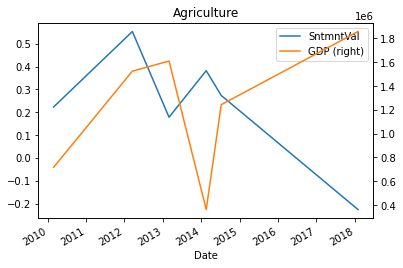

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 

# Plot the first x and y axes:
agriDf.plot(x = 'Date', y = 'SntmntVal', ax = ax) 
agriDf.plot(x = 'Date', y = 'GDP', ax = ax, secondary_y = True,title="Agriculture") 
# Agriculture

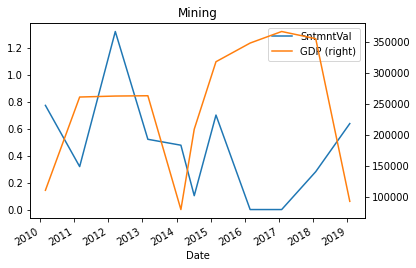

In [0]:
fig, ax = plt.subplots() 

miningDf.plot(x = 'Date', y = 'SntmntVal', ax = ax) 
miningDf.plot(x = 'Date', y = 'GDP', ax = ax, secondary_y = True,title="Mining") 
#Mining

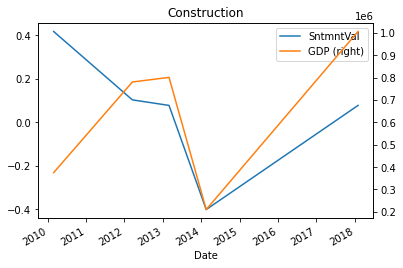

In [0]:
fig, ax = plt.subplots() 

cnstrctnDf.plot(x = 'Date', y = 'SntmntVal', ax = ax) 
cnstrctnDf.plot(x = 'Date', y = 'GDP', ax = ax, secondary_y = True,title="Construction") 
#Construction

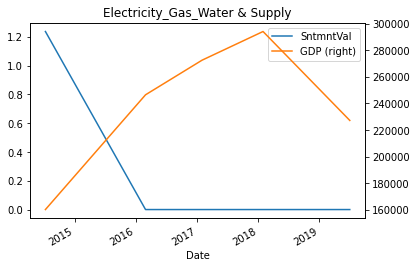

In [0]:
fig, ax = plt.subplots() 

elctrcDf.plot(x = 'Date', y = 'SntmntVal', ax = ax) 
elctrcDf.plot(x = 'Date', y = 'GDP', ax = ax, secondary_y = True,title="Electricity_Gas_Water & Supply") 
#Electricity_Gas_Water_Supply

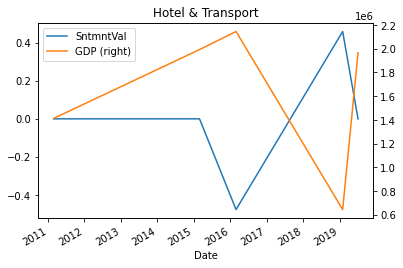

In [0]:
fig, ax = plt.subplots() 

htlDf.plot(x = 'Date', y = 'SntmntVal', ax = ax) 
htlDf.plot(x = 'Date', y = 'GDP', ax = ax, secondary_y = True,title="Hotel & Transport") 

#Hotel_Transport

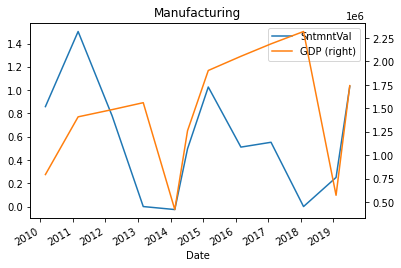

In [0]:
fig, ax = plt.subplots() 

mnfctDf.plot(x = 'Date', y = 'SntmntVal', ax = ax) 
mnfctDf.plot(x = 'Date', y = 'GDP', ax = ax, secondary_y = True,title="Manufacturing") 
#Manufacturing

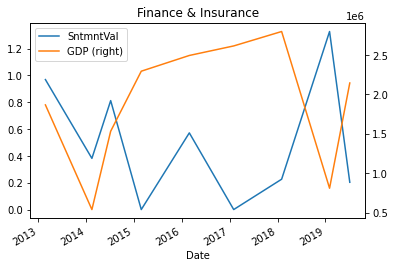

In [0]:
fig, ax = plt.subplots() 

finDf.plot(x = 'Date', y = 'SntmntVal', ax = ax) 
finDf.plot(x = 'Date', y = 'GDP', ax = ax, secondary_y = True,title="Finance & Insurance") 

#Finance_Insurance

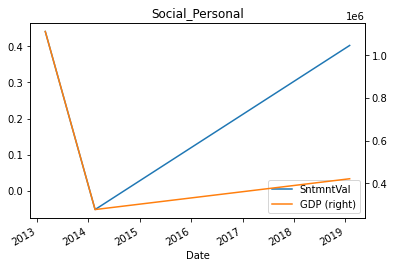

In [0]:
fig, ax = plt.subplots() 

sclDf.plot(x = 'Date', y = 'SntmntVal', ax = ax) 
sclDf.plot(x = 'Date', y = 'GDP', ax = ax, secondary_y = True,title="Social_Personal") 
#Social_Personal

Sector/Topic wise Correlation Results- Sentiment VS GDP

1. Agriculture
    
    We can see the positive relation between 2010 to 2012 and negative relation for the range 2013 to 2019,overall it’s negative

2. Mining   
     
    We can see the negative relation from 2010 to 2011 and no relation between 2011 to 2013 and positive relation between 2013 to 2015 and again negative relation between 2015 to 2019, overall it’s negative

3. Construction

 We can see the negative relation from 2010 to 2012 and positive relation between 2013 to 2019 , overall it’s a positive relation

4. Electricity_Gas_Water_Supply

     We can see the negative relation from 2013 to 2016 and negative relation between 2016 to 2019 , overall it’s a negative relation

5. Hotel_Transport

 We can see no relation from 2011 to 2015 and no relation between 2015 to 2019 , overall it’s a negative relation 

6. Manufacturing

	We can see positive relation from 2011 to 2012 ,negative relation between 2012 to 2014 ,positive relation 2014  to  2015 ,-ve relation between 2015 to 2016 ,+ve relation between 2016 to 2017 ,2017 to 18 –ve and 2018 to 19 +ve,overall it’s a positive relation

7. Finance_Insurance

 We can see + ve relation between 2013 to 2014 ,no relation between 2014 to 2017 ,+ve relation between 2017 to 2018 and  -ve relation between 2018 to2019,overall it’s a - ve relation
8. Social_Personal
  
   We can see positive relation between 2014 to 2019.